# John Alejandro Velez Velez

# CC. 1026156088

In [136]:
import pandas as pd
from numpy import sqrt,e

In [137]:
#constantes necesarias:

ai=2.7619/e**(5)
bi=3.8095/e**(9)
ao=1.3786/e**(4)
bo=1.4286/e**(9)
ris=0.72
ros=1.77
ts=5780
ls=3.827*10**26 # luminosidad del sol



In [139]:
# funciones para crear las columnas que se piden

def convertmass(kj):
    # la masa de jupiter es 317.83 veces la masa de la tierra
    ke=317.83
    me=kj*ke #masa con respecto a la tierra
    return(me)

def convertrad(kj):
    # el radio de jupiter es 11.209 veces el de la tierra
    ke=11.209
    re=kj*ke
    return(re)

def  lum(Test,rj):
    
    # el numero de radios solares del planeta esta dado por: 
    rs=0.10045*rj  # 0.10045 las veces que esta el radio de jupiter en el del sol
    
    #numero de veces que esta la temperatura efectiva en la solar:
    keff=Test/5778 # 5778 es la temperatura efectiva del sol
    
    # de esta manera la luminosidad dada en terminos de la luminosidad del sol es:
    l=rs*rs*keff*keff*keff*keff
    
    return(l)

def ri(teff,l):
    ri=(ris-ai*(teff-ts)-bi*(teff-ts)*(teff-ts))*sqrt(l)
    return(ri)

def ro(teff,l):
    ro=(ros-ao*(teff-ts)-bo*(teff-ts)*(teff-ts))*sqrt(l)
    return(ro)

In [140]:
#trae el arcchivo al jupyter:
File="exoplanets.csv" 
# genera el DF del archivo:
exop=pd.read_csv("exoplanets.csv") 

exo=exop[['NAME','TEFF','MASS','A','DENSITY','R','STAR','MSTAR','RSTAR','BINARY']] #nos crea el DF con los datos pedidos
exo=exo.dropna() #nos deja los valores del DF que tienen toda la informacion completa

# elimina las filas con valor BYNARY igual a cero:
exo=exo.drop(exo[exo['BINARY']==0.0].index) 

# nos crea la columna en masas de la tierra:
exo['MASSE']=convertmass(exo['MASS']) 

# nos crea la columna en radios terrestres:
exo['RE']=convertrad(exo['R']) 

#nos crea la columna de luminosidad:
exo['LUM']=lum(exo['TEFF'],exo['RSTAR']) 

# nos crean las columnas con los radios interior y exterior:
exo['ri']=ri(exo['TEFF'],exo['LUM'])
exo['ro']=ro(exo['TEFF'],exo['LUM'])

# nos crea el DF solo con los planetas rocosos, esta eliminando los planetas con densidad menor a 5:
roc=exo[['NAME','DENSITY']].drop(exo[exo['DENSITY']<5].index)

# crea el DF con los planetas en la zona de habitabilidad
# primero elimina los que tienen semieje mayor con valor menor al radio interior
# y luego elimina los que tienen semieje mayor con valor mayor al radio interior
ha=exo.drop(exo[exo['A']<exo['ri']].index)
ha=ha.drop(exo[exo['A']>exo['ro']].index)

#exo.head()

#ha.head()

C:\Users\USUARIO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,117,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [141]:
print('planetas con probabilidad con ser rocosos')
roc.head()

planetas con probabilidad con ser rocosos


,NAME,DENSITY
14,Kepler-20 b,6.50000
200,Kepler-10 b,8.80000
700,HD 80606 b,7.94618
765,Kepler-10 c,5.00000
1011,Kepler-97 b,5.44000


In [142]:
print('planetas con probabilidad de ser habitables')

ha.head()

planetas con probabilidad de ser habitables


,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,ro
29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065,1.0,2.899999,2.867442,0.010560,-0.363606,0.237468
200,Kepler-10 b,5627.0,0.014282,0.016757,8.80,0.126327,Kepler-10,0.895,1.056,1.0,4.539375,1.415999,0.010121,-0.748289,0.151525
461,Kepler-11 b,5663.0,0.005978,0.091450,1.72,0.160400,Kepler-11,0.961,1.065,1.0,1.900000,1.797924,0.010560,-0.363606,0.237468
1397,Kepler-96 b,5690.0,0.026166,0.125499,2.26,0.238201,Kepler-96,1.000,1.020,1.0,8.316308,2.669995,0.009873,-0.140417,0.259775
1398,Kepler-11 d,5663.0,0.022968,0.154764,1.28,0.278100,Kepler-11,0.961,1.065,1.0,7.300015,3.117223,0.010560,-0.363606,0.237468


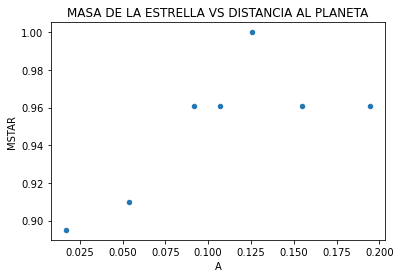

In [143]:
ha.plot(kind='scatter',y='MSTAR',x='A',title='MASA DE LA ESTRELLA VS DISTANCIA AL PLANETA')

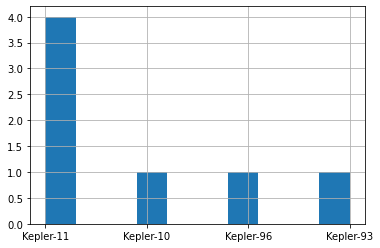

In [144]:
# NOS DICE EL NUMERO DE PLANETAS QUE ORBITAN ALREDEDOR DE CIERTA ESTRELLA EN LA ZONA DE HABITABILIDAD
ha['STAR'].hist()

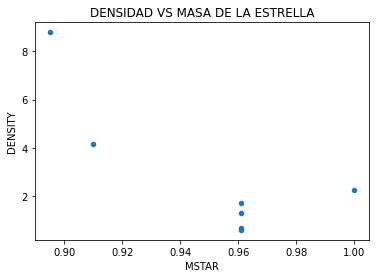

In [145]:
ha.plot(kind='scatter',x='MSTAR',y='DENSITY',title='DENSIDAD VS MASA DE LA ESTRELLA')

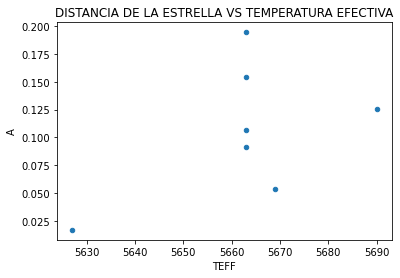

In [146]:
ha.plot(kind='scatter',x='TEFF',y='A',title='DISTANCIA DE LA ESTRELLA VS TEMPERATURA EFECTIVA')